In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [145]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': '12',
          'figure.figsize': (16, 9),
          'axes.labelsize': '12',
          'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12',
          'patch.linewidth': 0.0
         }

plt.rcParams.update(params)

In [148]:
raw_data = pd.read_csv("../dataset.csv", sep=',', decimal='.')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       866 non-null    float64
 1   sex       866 non-null    float64
 2   cp        866 non-null    float64
 3   trestbps  809 non-null    float64
 4   chol      840 non-null    float64
 5   fbs       784 non-null    float64
 6   restecg   865 non-null    float64
 7   thalach   811 non-null    float64
 8   exang     811 non-null    float64
 9   oldpeak   806 non-null    float64
 10  slope     570 non-null    float64
 11  ca        297 non-null    float64
 12  thal      413 non-null    float64
 13  label     866 non-null    int64  
 14  split     866 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 101.6+ KB


1. age: edad del paciente       
2. sex: sexo del paciente       
3. cp: tipo de dolor de pecho:
    - 1: angina típica
    - 2: angina atípica
    - 3: dolor no-anginoso
    - 4: asintomático
4. trestbps: presión arterial en reposo (en mm Hg al ingreso en el hospital)
5. chol: colesterol sérico en mg/dl
6. fbs: dolor provocado por el esfuerzo (1 = sí; 0 = no)
7. restecg: resultados electrocardiográficos en reposo
    - 0: normal
    - 1: presenta anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST elevación o depresión del ST > 0,05 mV)
    - 2: presenta probable o definida hipertrofia ventricular izquierda
8. thalach: frecuencia cardiaca en reposo
9. exang: angina inducida por el ejercicio (1 = sí; 0 = no)
10. oldpeak: depresión del ST inducida por el ejercicio en relación con el reposo
11. slope: la pendiente del segmento ST en ejercicio máximo
    - 1: pendiente ascendente
    - 2: plano
    - 3: pendiente descendente
12. ca: número de vasos mayores (0-3) coloreados por flouroscopia      
13. thal: trastorno talasémico
    - 3: normal
    - 6: defecto fijo 
    - 7: defecto reversible
14. label (target): indica la ausencia (0) o el grado de enfermedad cardíaca (1-4)

  

In [149]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
0,56.0,1.0,2.0,126.0,166.0,0.0,1.0,140.0,0.0,0.0,NaN,NaN,NaN,0,val
1,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0,train
2,57.0,1.0,2.0,180.0,285.0,1.0,1.0,120.0,0.0,0.8,NaN,NaN,NaN,1,train
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0,train
4,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1,train


In [150]:
# comprobamos si hay filas duplicadas
raw_data[raw_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
95,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2,train


In [151]:
# borramos la fila duplicada
data = raw_data.drop_duplicates()

In [152]:
# definimos que variables son categóricas (discretas), y cuales son numéricas (contínuas)
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = ['label']

In [153]:
# vamos a parsear las variables categóricas como enteros y luego las pasamos a string, para que su valor 
# numérico no influya en el análisis ni en las predicciones
data[categorical_vars + target] = data[categorical_vars + target].astype(float).astype('Int64')
data[categorical_vars + target] = data[categorical_vars + target].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       865 non-null    float64
 1   sex       865 non-null    object 
 2   cp        865 non-null    object 
 3   trestbps  808 non-null    float64
 4   chol      839 non-null    float64
 5   fbs       865 non-null    object 
 6   restecg   865 non-null    object 
 7   thalach   810 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   805 non-null    float64
 10  slope     865 non-null    object 
 11  ca        865 non-null    object 
 12  thal      865 non-null    object 
 13  label     865 non-null    object 
 14  split     865 non-null    object 
dtypes: float64(5), object(10)
memory usage: 108.1+ KB


In [154]:
# unique counts per columns
counts = { col: data[col].value_counts().shape[0] for col in list(data.columns)}
pd.DataFrame(counts, index=['Unique counts'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
Unique counts,50,2,4,61,208,3,4,119,3,52,4,6,4,5,2


In [155]:
vals = { col: [sorted(list(data[col].dropna().unique()))] for col in list(data.columns) }
pd.DataFrame(vals, index=['Unique values']).transpose()

,Unique values
age,"[28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35...."
sex,"[0, 1]"
cp,"[1, 2, 3, 4]"
trestbps,"[0.0, 80.0, 92.0, 94.0, 95.0, 96.0, 98.0, 100...."
chol,"[0.0, 85.0, 100.0, 117.0, 126.0, 129.0, 131.0,..."
fbs,"[0, 1, <NA>]"
restecg,"[0, 1, 2, <NA>]"
thalach,"[60.0, 63.0, 67.0, 69.0, 70.0, 71.0, 72.0, 73...."
exang,"[0, 1, <NA>]"
oldpeak,"[-2.6, -2.0, -1.5, -1.1, -1.0, -0.9, -0.8, -0...."


In [156]:
data[numerical_vars].describe()

,age,trestbps,chol,thalach,oldpeak
count,865.000000,808.000000,839.000000,810.000000,805.000000
mean,53.431214,132.070545,199.400477,137.717284,0.847702
std,9.475490,19.130575,109.722994,26.163654,1.071527
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,176.500000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000
75%,60.000000,140.000000,267.500000,158.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [157]:
data[(categorical_vars + target)].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,label
count,865,865,865,865,865,865,865,865,865
unique,2,4,3,4,3,4,6,4,5
top,1,4,0,0,0,2,<NA>,<NA>,0
freq,682,464,658,520,498,320,568,452,399


In [158]:
# Vamos a ver la distribución de los valores no informados
df =  pd.DataFrame(data.isna().sum().to_dict(), index=[f"Missing values - total"])

for val in [0, 1, 2, 3, 4]:
    tmp = pd.DataFrame(data[data['label'] == str(val)].isna().sum().to_dict(), index=[f"Missing values - label = {val}"])
    df = pd.concat([df, tmp], axis=0)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
Missing values - total,0,0,0,57,26,0,0,55,0,60,0,0,0,0,0
Missing values - label = 0,0,0,0,20,17,0,0,20,0,21,0,0,0,0,0
Missing values - label = 1,0,0,0,13,1,0,0,13,0,14,0,0,0,0,0
Missing values - label = 2,0,0,0,8,5,0,0,7,0,8,0,0,0,0,0
Missing values - label = 3,0,0,0,14,3,0,0,13,0,15,0,0,0,0,0
Missing values - label = 4,0,0,0,2,0,0,0,2,0,2,0,0,0,0,0


In [159]:
# Además de valores no informados, tenemos 0s en algunas variables numéricas
df = pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].eq(0).sum().to_dict(), index=[f"Zero values - total"])

for val in [0, 1, 2, 3, 4]:
    tmp = pd.DataFrame(data[data['label'] == str(val)][['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].eq(0).sum().to_dict(), index=[f"Zero values - label = {val}"])
    df = pd.concat([df, tmp], axis=0)

df

,age,trestbps,chol,thalach,oldpeak
Zero values - total,0,1,159,0,354
Zero values - label = 0,0,0,20,0,238
Zero values - label = 1,0,0,57,0,60
Zero values - label = 2,0,0,42,0,33
Zero values - label = 3,0,1,36,0,19
Zero values - label = 4,0,0,4,0,4


Para `oldpeak`, un 0 significa que no hay anomalías, pero para `chol` o `trestbps`, las medidas deberían ser siempre mayores que 0, un 0 es una medida errónea, por lo que deberíamos tratarlos como los valores no informados.


In [160]:
# Reemplazamos 0s en chol y trestbps con NAs
data[['trestbps', 'chol']] = data[['trestbps', 'chol']].replace(0, np.nan)

tmp1 = pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].eq(0).sum().to_dict(), index=[f"Zero values - total"])
tmp2 =  pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].isna().sum().to_dict(), index=[f"Missing values - total"])

pd.concat([tmp1, tmp2], axis=0)

,age,trestbps,chol,thalach,oldpeak
Zero values - total,0,0,0,0,354
Missing values - total,0,58,185,55,60


In [161]:
from sklearn.impute import KNNImputer

cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[cols] = data[cols].replace(pd.NA, np.nan)

imputer = KNNImputer(missing_values=np.nan, n_neighbors=8)
data[cols] = imputer.fit_transform(data[cols])

tmp1 = pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].eq(0).sum().to_dict(), index=[f"Zero values - total"])
tmp2 =  pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].isna().sum().to_dict(), index=[f"Missing values - total"])

pd.concat([tmp1, tmp2], axis=0)

,age,trestbps,chol,thalach,oldpeak
Zero values - total,0,0,0,0,354
Missing values - total,0,0,0,0,0


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 865
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       865 non-null    float64
 1   sex       865 non-null    object 
 2   cp        865 non-null    object 
 3   trestbps  865 non-null    float64
 4   chol      865 non-null    float64
 5   fbs       865 non-null    object 
 6   restecg   865 non-null    object 
 7   thalach   865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   865 non-null    float64
 10  slope     865 non-null    object 
 11  ca        865 non-null    object 
 12  thal      865 non-null    object 
 13  label     865 non-null    object 
 14  split     865 non-null    object 
dtypes: float64(5), object(10)
memory usage: 108.1+ KB


In [163]:
# Ahora vamos a analizar los outliers 
for var in ['age', 'trestbps', 'chol', 'thalach']:
    tmp_data = data[var][data[var] > 0].dropna()
    q1, q3 = np.quantile(tmp_data, 0.25), np.quantile(tmp_data, 0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    print(f"{var} - min: {tmp_data.min()} - lower_limit: {lower} - Q1: {q1} - Q3: {q3} - IQR: {iqr} - upper_limit: {upper} - max: {tmp_data.max()}")
            
tmp_data = data['oldpeak'].dropna()
q1, q3 = np.quantile(tmp_data, 0.25), np.quantile(tmp_data, 0.75)
iqr = q3 - q1
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off
print(f"oldpeak - min: {tmp_data.min()} - lower_limit: {lower} - Q1: {q1} - Q3: {q3} - IQR: {iqr} - upper_limit: {upper} - max: {tmp_data.max()}")

age - min: 28.0 - lower_limit: 27.5 - Q1: 47.0 - Q3: 60.0 - IQR: 13.0 - upper_limit: 79.5 - max: 77.0
trestbps - min: 80.0 - lower_limit: 90.0 - Q1: 120.0 - Q3: 140.0 - IQR: 20.0 - upper_limit: 170.0 - max: 200.0
chol - min: 85.0 - lower_limit: 135.0 - Q1: 216.0 - Q3: 270.0 - IQR: 54.0 - upper_limit: 351.0 - max: 603.0
thalach - min: 60.0 - lower_limit: 66.0 - Q1: 120.0 - Q3: 156.0 - IQR: 36.0 - upper_limit: 210.0 - max: 202.0
oldpeak - min: -2.6 - lower_limit: -2.25 - Q1: 0.0 - Q3: 1.5 - IQR: 1.5 - upper_limit: 3.75 - max: 6.2


In [164]:
for var in ['trestbps', 'chol', 'thalach']:
    tmp_data = data[var][data[var] > 0].dropna()
    q1, q3 = np.quantile(tmp_data, 0.25), np.quantile(tmp_data, 0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    data.loc[data[var] > upper, var] = upper
    data.loc[data[var] < lower, var] = lower
    
# Para oldpeak no filtramos valores negativos, ya que son posibles
tmp_data = data['oldpeak'].dropna()
q1, q3 = np.quantile(tmp_data, 0.25), np.quantile(tmp_data, 0.75)
iqr = q3 - q1
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off
data.loc[data['oldpeak'] > upper, 'oldpeak'] = upper
data.loc[data['oldpeak'] < lower, 'oldpeak'] = lower

In [165]:
data['oldpeak'].describe()

count    865.000000
mean       0.841980
std        1.006747
min       -2.250000
25%        0.000000
50%        0.562500
75%        1.500000
max        3.750000
Name: oldpeak, dtype: float64

In [166]:
pd.DataFrame(data[categorical_vars].isna().sum().to_dict(), index=[f"Missing values - categorical"])

,sex,cp,fbs,restecg,exang,slope,ca,thal
Missing values - categorical,0,0,0,0,0,0,0,0


In [167]:
# Al parsear a string, los NA values se han parseado también como string
pd.DataFrame(data[categorical_vars].eq('<NA>').sum().to_dict(), index=[f" <NA> values - categorical"])

,sex,cp,fbs,restecg,exang,slope,ca,thal
<NA> values - categorical,0,0,82,1,55,295,568,452


In [168]:
# ca = 9 es un outlier, lo clippeamos a 3, que es el valor máximo según las especificaciones
data['ca'] = data['ca'].replace('9', '3')

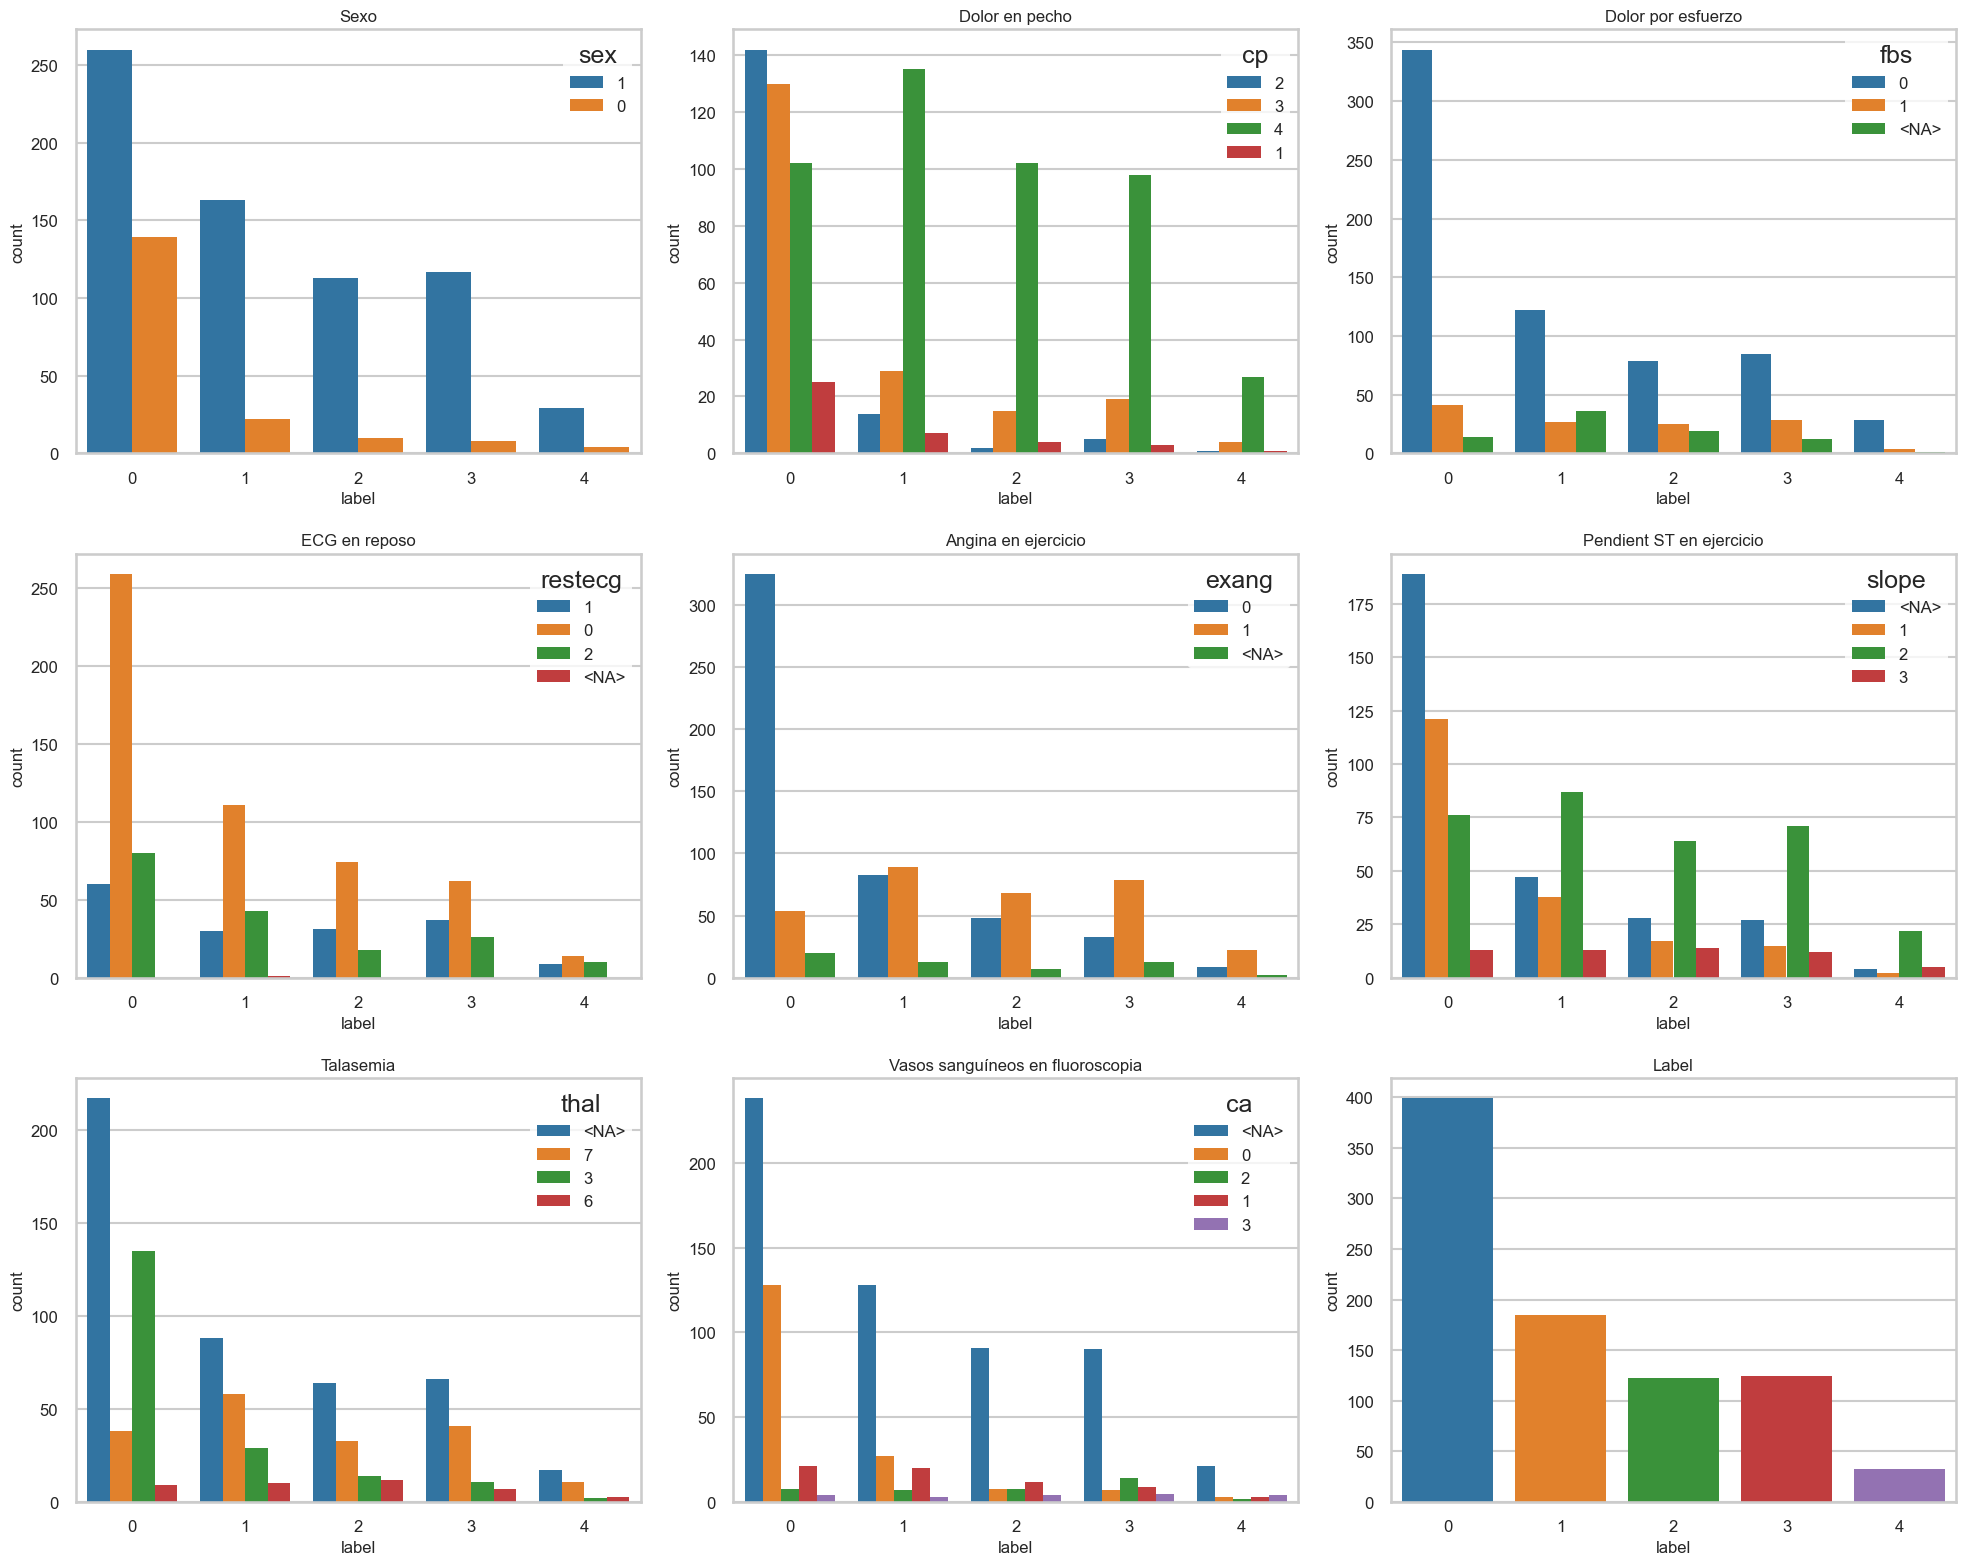

<Figure size 1600x900 with 0 Axes>

In [169]:
# Vamos a visualizar la distribución de variables categóricas

fig, axes = plt.subplots(3, 3, figsize=(20,16))

sns.countplot(hue='sex', x='label', data=data, ax=axes[0,0])
axes[0,0].set_title('Sexo')

sns.countplot(hue='cp', x='label', data=data, ax=axes[0,1])
axes[0,1].set_title('Dolor en pecho')

sns.countplot(hue='fbs', x='label', data=data, ax=axes[0,2])
axes[0,2].set_title('Dolor por esfuerzo')

sns.countplot(hue='restecg', x='label', data=data, ax=axes[1,0])
axes[1,0].set_title('ECG en reposo')

sns.countplot(hue='exang', x='label', data=data, ax=axes[1,1])
axes[1,1].set_title('Angina en ejercicio')

sns.countplot(hue='slope', x='label', data=data, ax=axes[1,2])
axes[1,2].set_title('Pendient ST en ejercicio')

sns.countplot(hue='thal', x='label', data=data, ax=axes[2,0])
axes[2,0].set_title('Talasemia')

sns.countplot(hue='ca', x='label', data=data, ax=axes[2,1])
axes[2,1].set_title('Vasos sanguíneos en fluoroscopia')

sns.countplot(x='label', data=data, ax=axes[2,2])
axes[2,2].set_title('Label')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

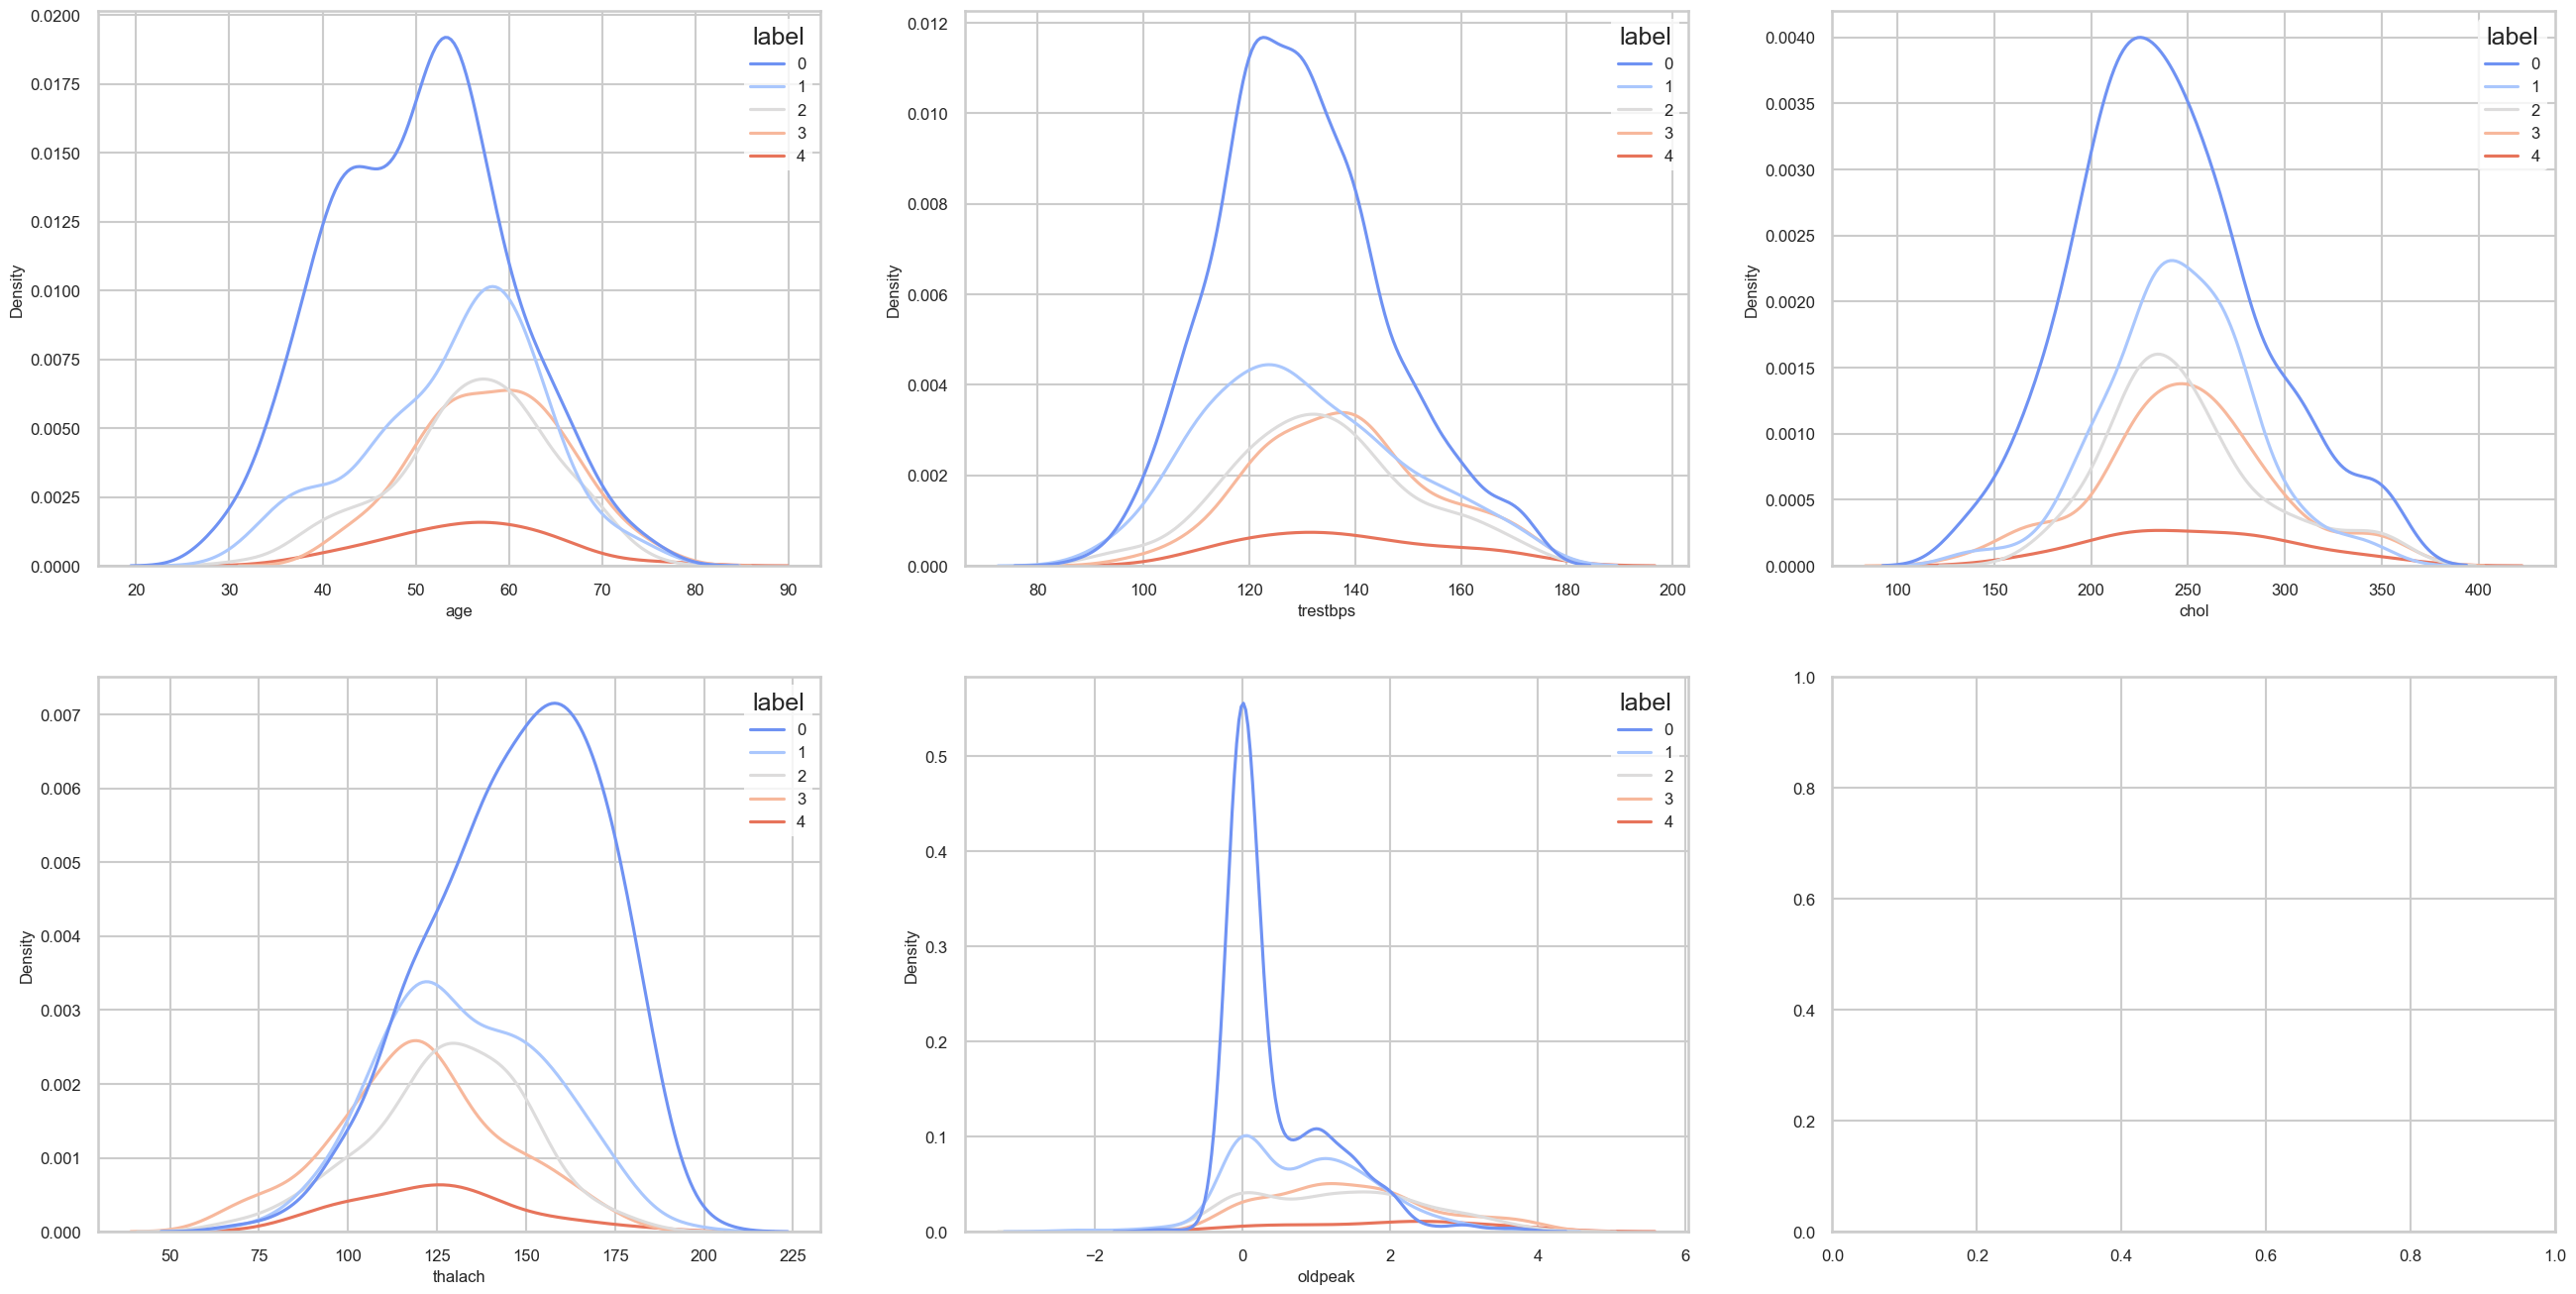

In [170]:
# ahora visualizamos las variables numéricas
# Primero la función de distribución
fig, axes = plt.subplots(2,3, figsize=(32,16))

sns.kdeplot(x='age', hue='label', data=data[numerical_vars + target], palette='coolwarm', ax=axes[0,0])
sns.kdeplot(x='trestbps', hue='label', data=data[numerical_vars + target], palette='coolwarm', ax=axes[0,1])
sns.kdeplot(x='chol', hue='label', data=data[numerical_vars + target], palette='coolwarm', ax=axes[0,2])
sns.kdeplot(x='thalach', hue='label', data=data[numerical_vars + target], palette='coolwarm', ax=axes[1,0])
sns.kdeplot(x='oldpeak', hue='label', data=data[numerical_vars + target], palette='coolwarm', ax=axes[1,1])

plt.show()

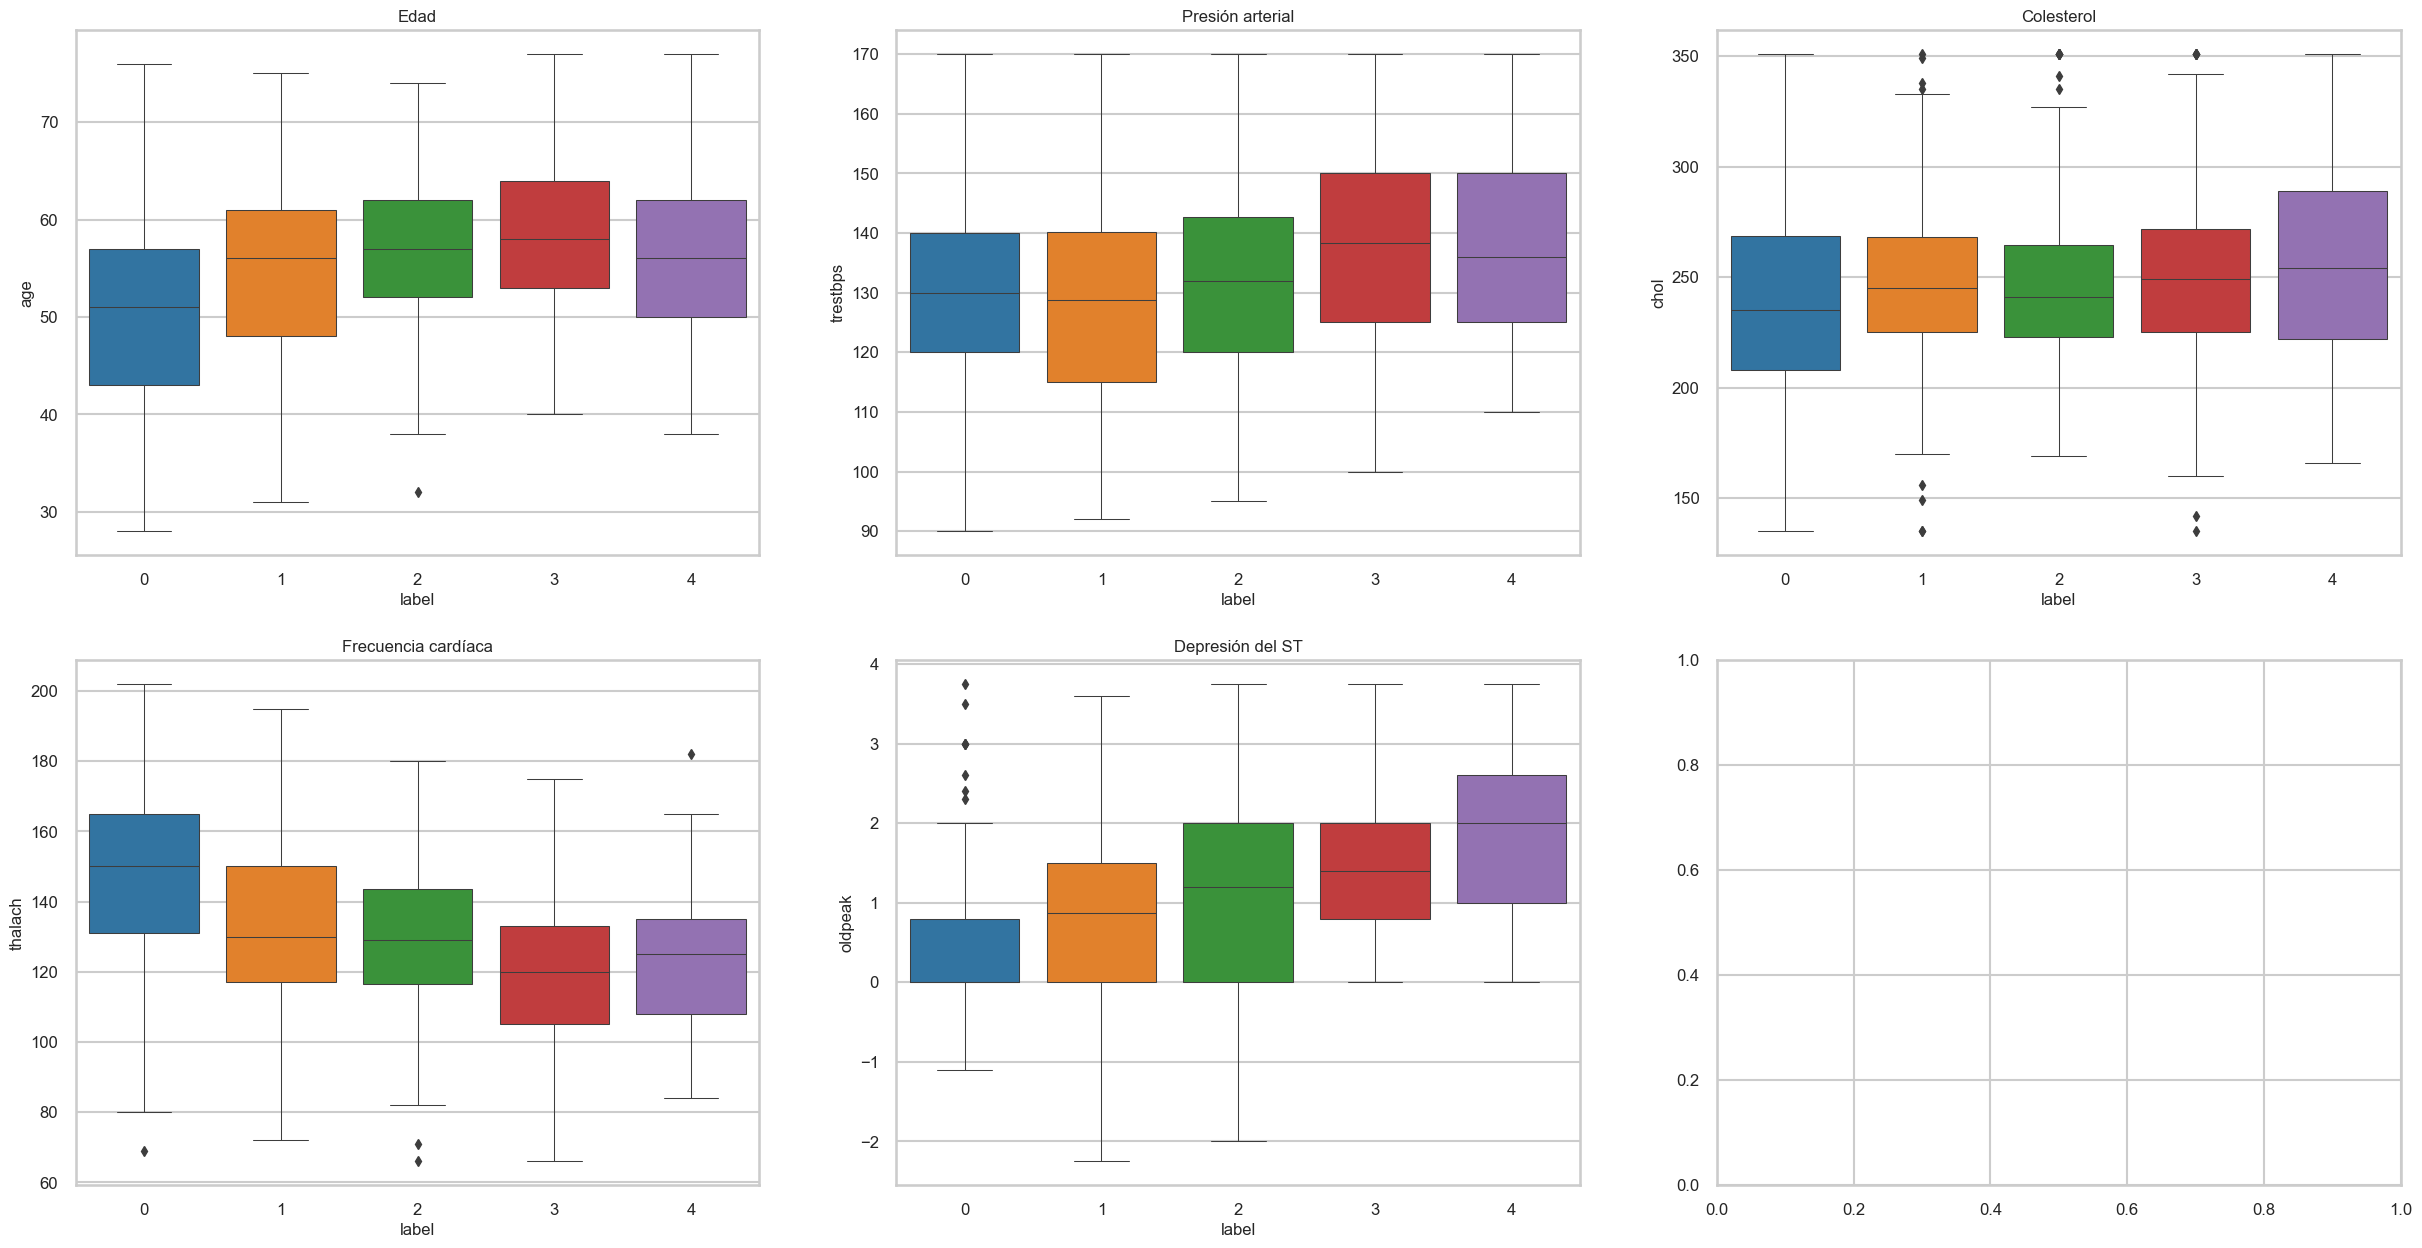

In [171]:
fig, axes = plt.subplots(2,3, figsize=(30,15))

sns.boxplot(x='label', y='age', data = data, ax=axes[0, 0], linewidth=0.75).set(title='Edad')
sns.boxplot(x='label', y='trestbps', data = data, ax=axes[0, 1], linewidth=0.75).set(title='Presión arterial')
sns.boxplot(x='label', y='chol', data = data, ax=axes[0, 2], linewidth=0.75).set(title='Colesterol')
sns.boxplot(x='label', y='thalach', data = data, ax=axes[1, 0], linewidth=0.75).set(title='Frecuencia cardíaca')
sns.boxplot(x='label', y='oldpeak', data = data, ax=axes[1, 1], linewidth=0.75).set(title='Depresión del ST')

plt.show()

Text(0.5, 1.0, 'Q-Q plot Depresión ST')

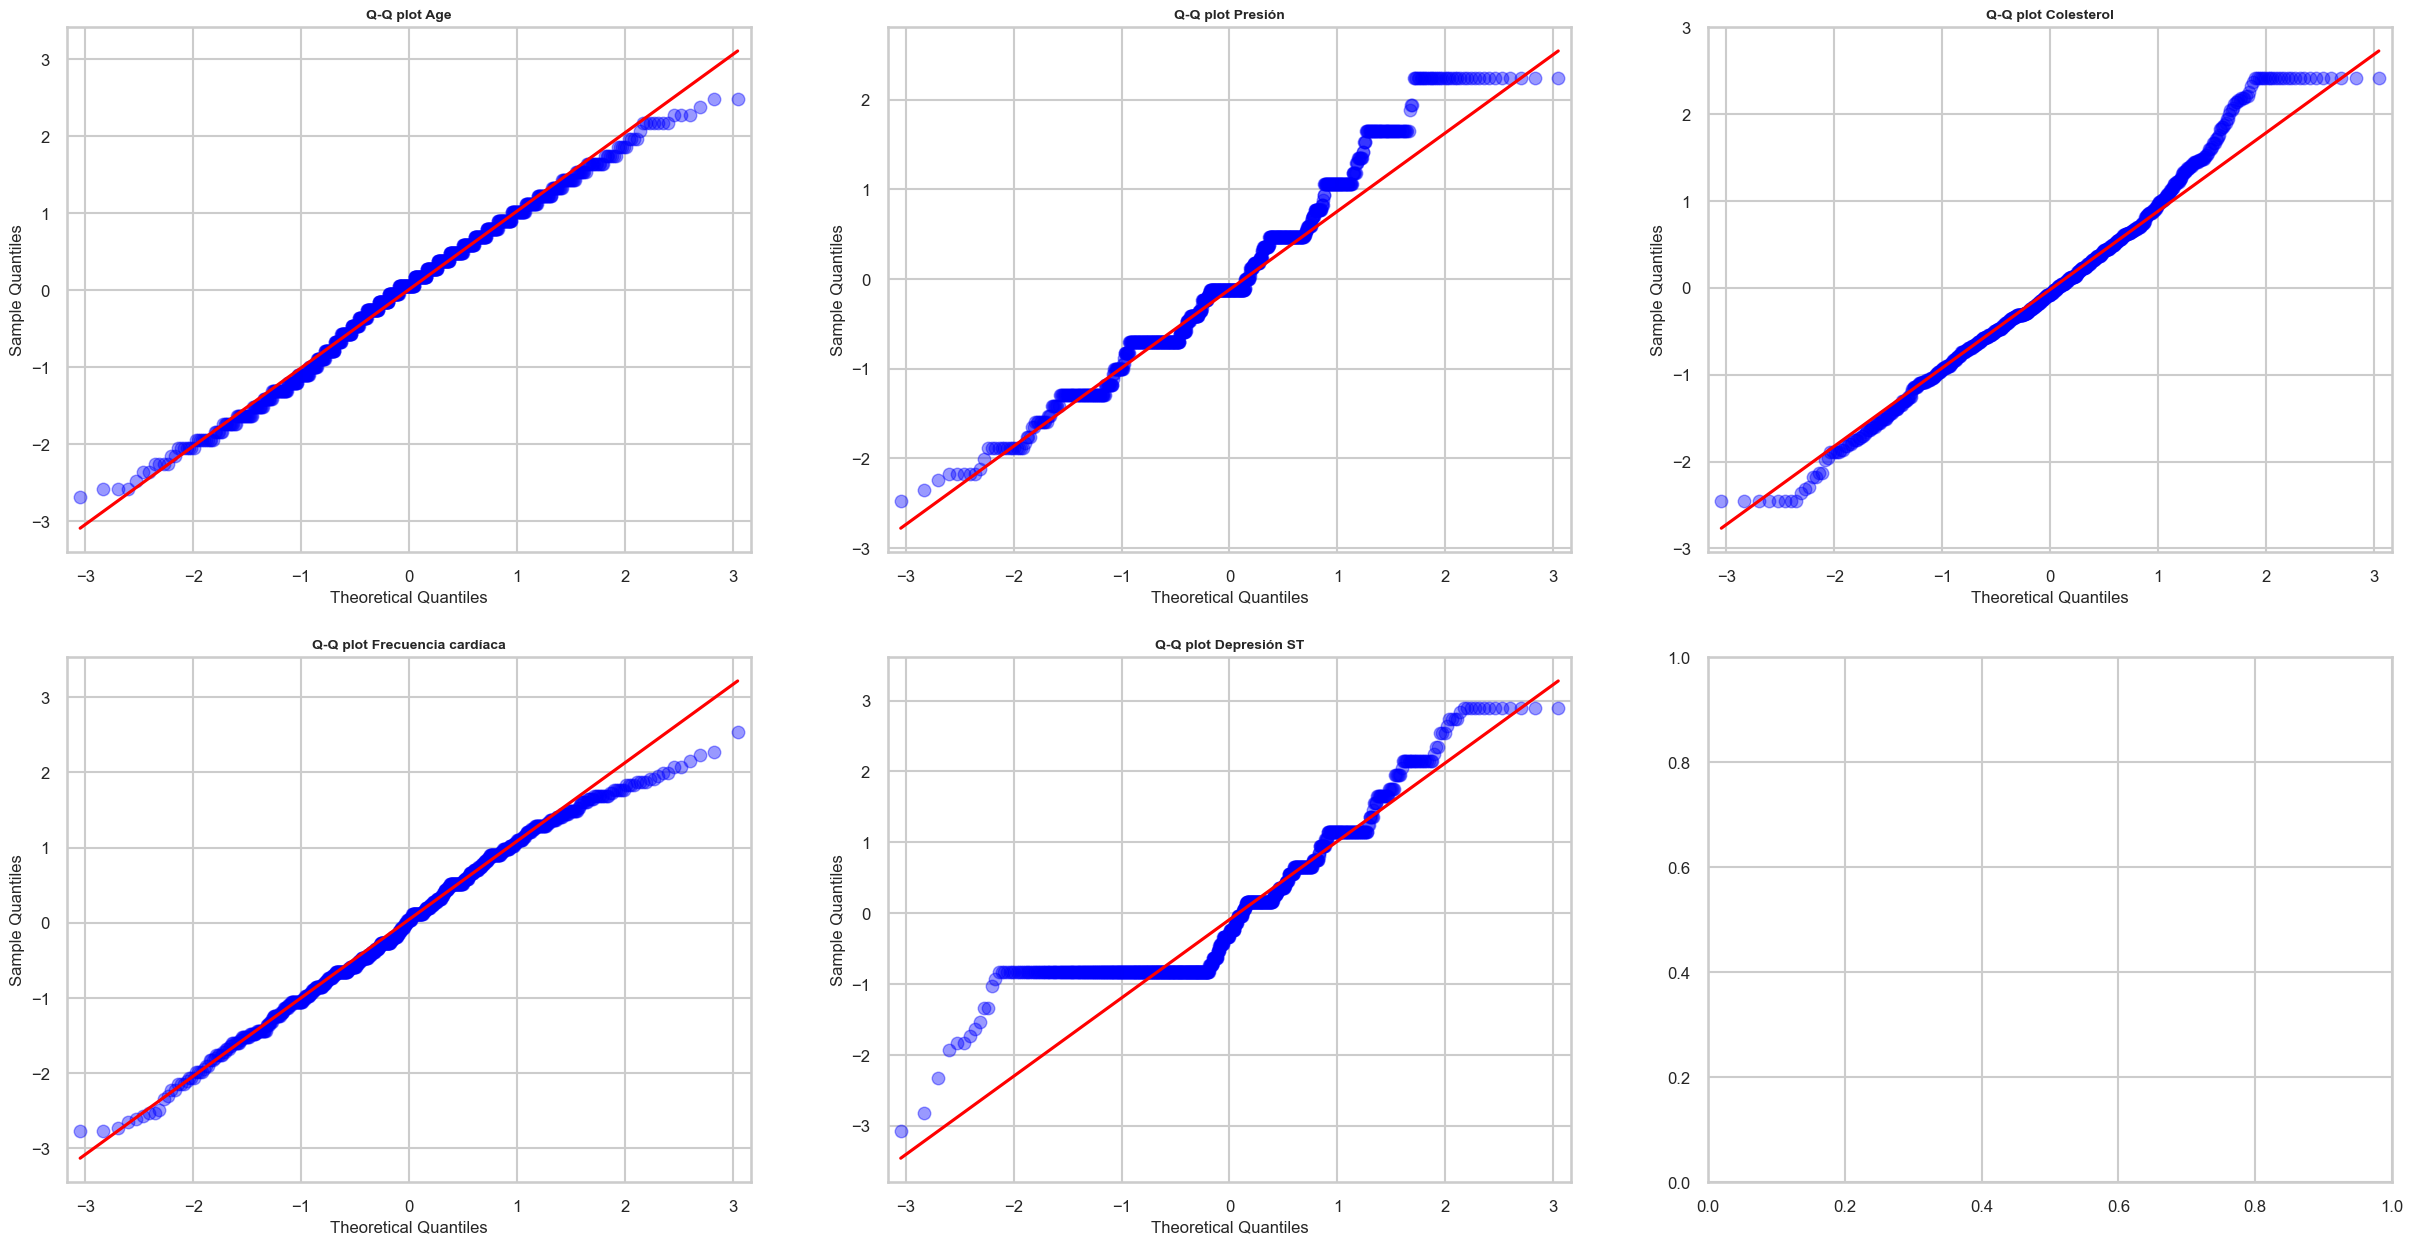

In [172]:
fig, axes = plt.subplots(2,3, figsize=(30,15))

sm.qqplot(data['age'], fit = True, line = 'q', alpha = 0.4, lw = 2, ax = axes[0, 0])
axes[0,0].set_title('Q-Q plot Age', fontsize = 10, fontweight = "bold")

sm.qqplot(data['trestbps'], fit = True, line = 'q', alpha = 0.4, lw = 2, ax = axes[0, 1])
axes[0,1].set_title('Q-Q plot Presión', fontsize = 10, fontweight = "bold")

sm.qqplot(data['chol'], fit = True, line = 'q', alpha = 0.4, lw = 2, ax = axes[0, 2])
axes[0,2].set_title('Q-Q plot Colesterol', fontsize = 10, fontweight = "bold")

sm.qqplot(data['thalach'], fit = True, line = 'q', alpha = 0.4, lw = 2, ax = axes[1, 0])
axes[1,0].set_title('Q-Q plot Frecuencia cardíaca', fontsize = 10, fontweight = "bold")

sm.qqplot(data['oldpeak'], fit = True, line = 'q', alpha = 0.4, lw = 2, ax = axes[1, 1])
axes[1,1].set_title('Q-Q plot Depresión ST', fontsize = 10, fontweight = "bold")

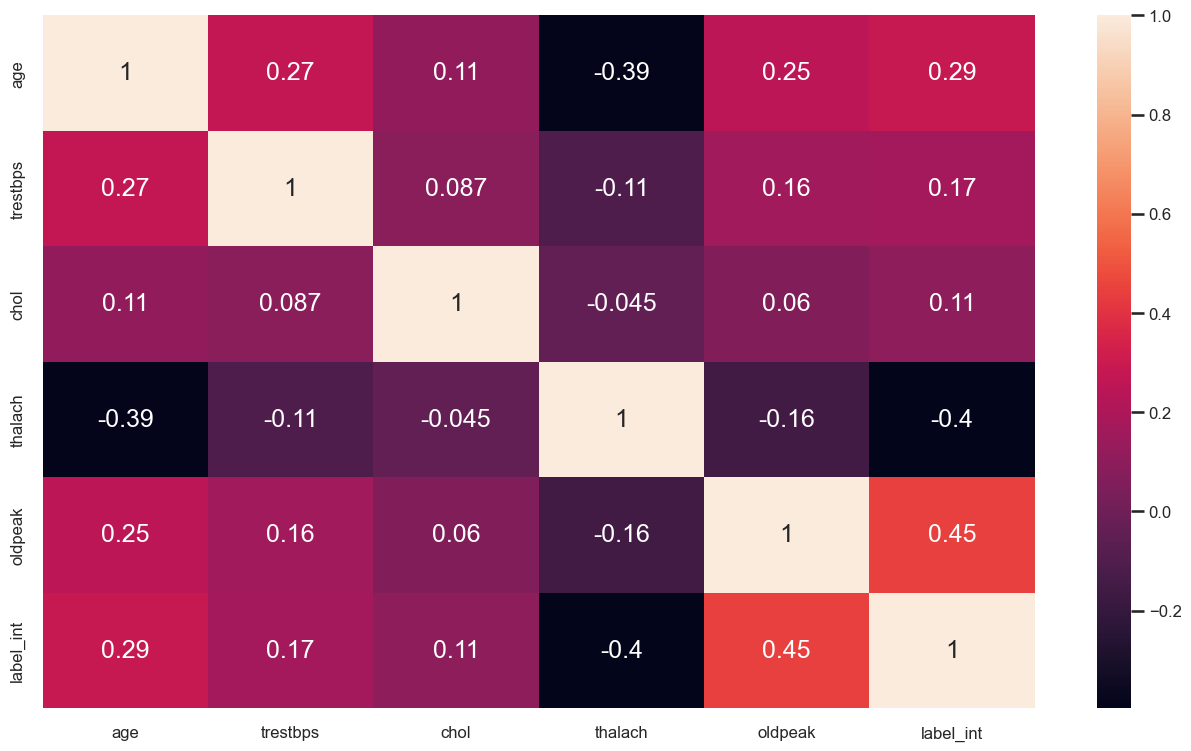

In [138]:
plt.figure(figsize=(16,9))
tmp = data.copy()
tmp['label_int'] = tmp['label'].astype(int)
ax = sns.heatmap(tmp[numerical_vars + ['label_int']].corr(method='pearson'),annot=True)

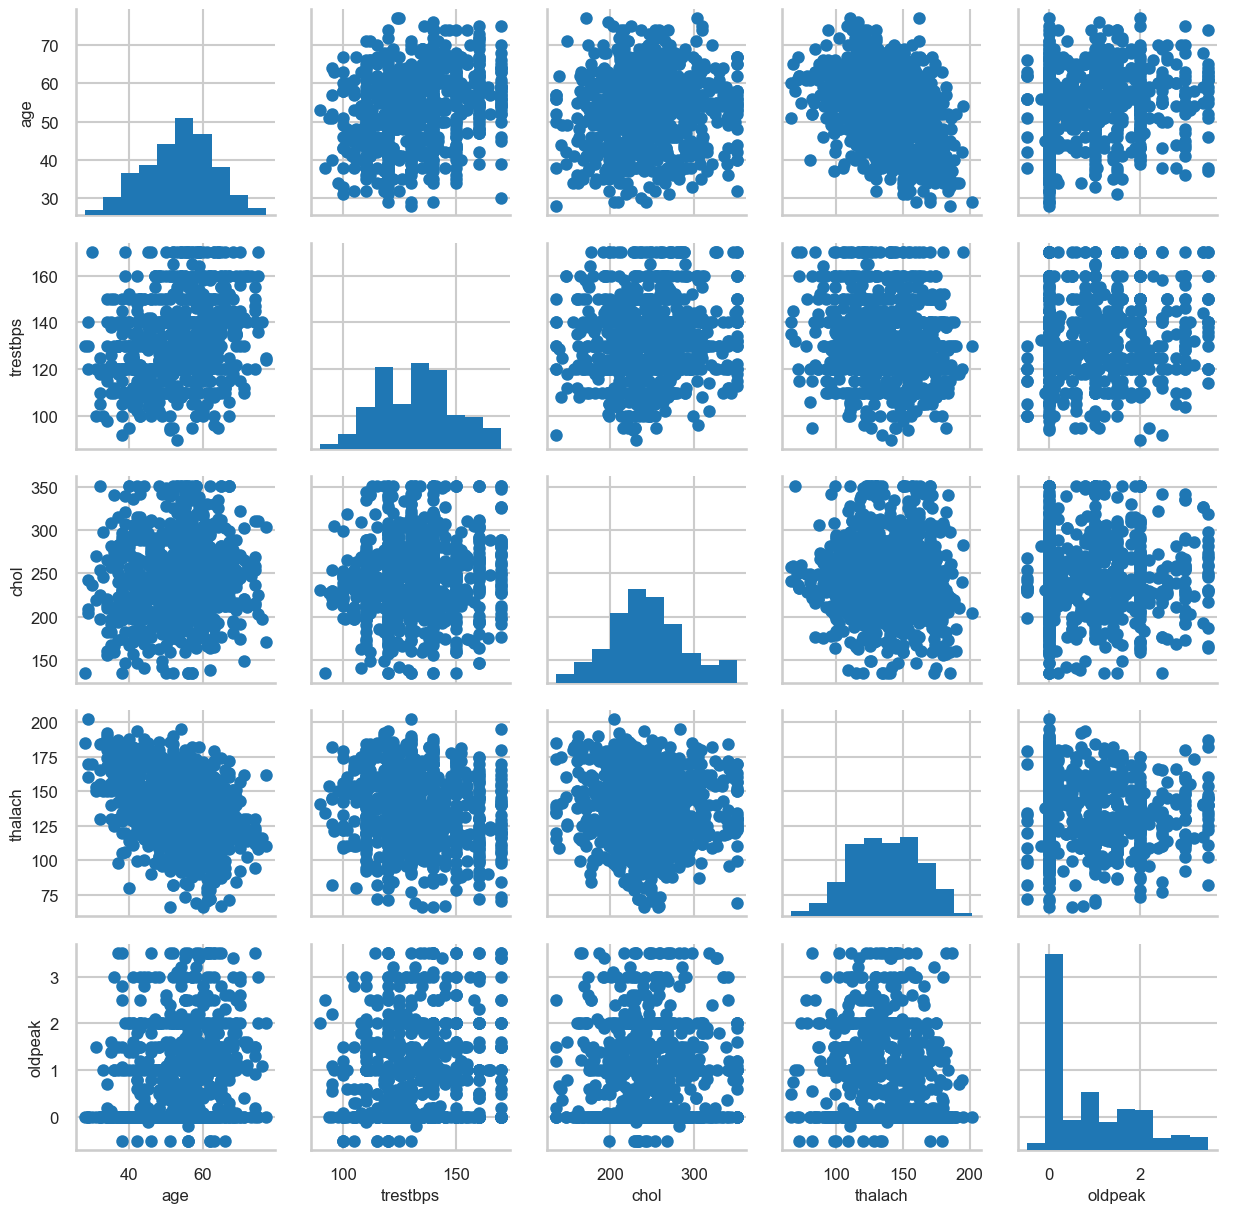

In [177]:
g = sns.PairGrid(data[categorical_vars + numerical_vars + target])
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
g = g.add_legend()
plt.show()

In [178]:
3 ** 5

243

In [29]:
data['oldpeak'].describe()

count    865.000000
mean       0.845332
std        0.979388
min       -0.500000
25%        0.000000
50%        0.562500
75%        1.500000
max        3.500000
Name: oldpeak, dtype: float64

In [179]:
print(sorted(list(data['oldpeak'].apply(round).unique())))

[-2, -1, 0, 1, 2, 3, 4]


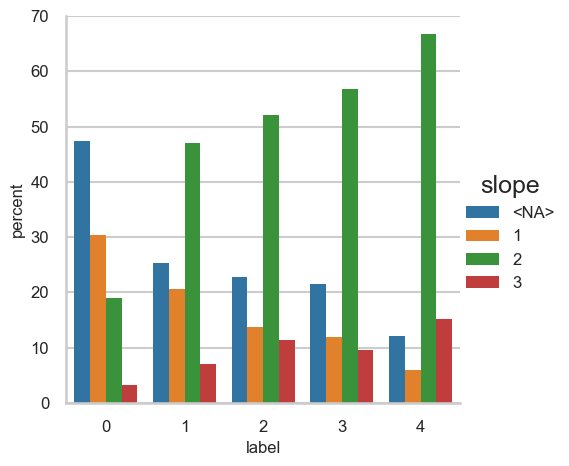

In [183]:
(data.groupby('label')['slope']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='label',y='percent',hue='slope',kind='bar'))

In [186]:
data['slope'].value_counts()

2       320
<NA>    295
1       193
3        57
Name: slope, dtype: int64

In [188]:
data['label'][data['slope'] == '1'].value_counts()

0    121
1     38
2     17
3     15
4      2
Name: label, dtype: int64

In [189]:
data['label'][data['slope'] == '3'].value_counts()

2    14
0    13
1    13
3    12
4     5
Name: label, dtype: int64

In [200]:
data['oldpeak2'] = np.where(np.abs(data['oldpeak']) >= 0.5, 1, 0)
data.loc[data['oldpeak'] == '<NA>', 'oldpeak2'] = '<NA>'
data['oldpeak2'].value_counts()

1    464
0    401
Name: oldpeak2, dtype: int64

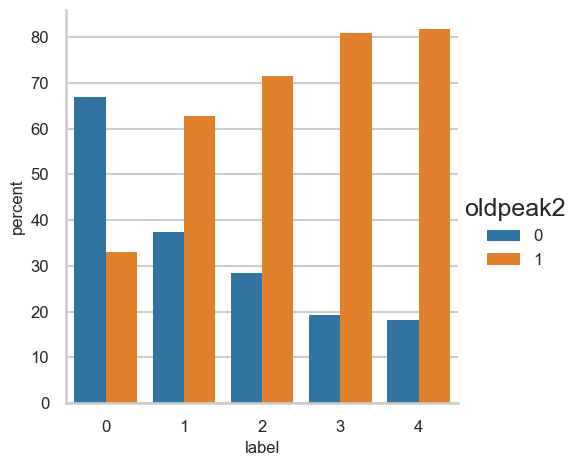

In [196]:
(data.groupby('label')['oldpeak2']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='label',y='percent',hue='oldpeak2',kind='bar'))

In [207]:
data['oldpeak_slope'] = data['oldpeak2'].astype(str) + '_' + data['slope'].astype(str)
data.loc[(data['slope'] == '<NA>'), 'oldpeak_slope'] = "<NA>"


data['oldpeak_slope'].value_counts()

<NA>    295
1_2     261
0_1     104
1_1      89
0_2      59
1_3      56
0_3       1
Name: oldpeak_slope, dtype: int64

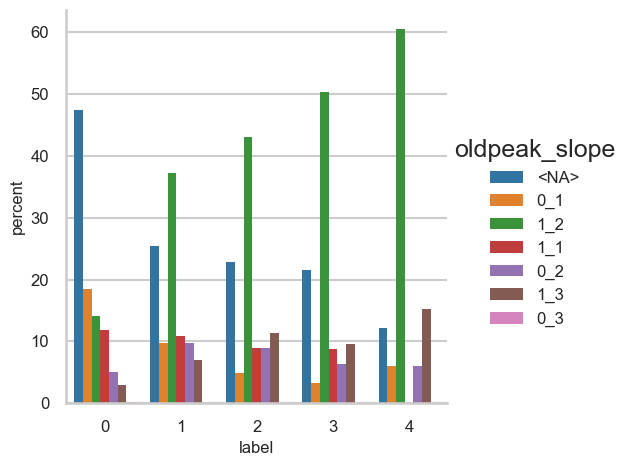

In [208]:
(data.groupby('label')['oldpeak_slope']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='label',y='percent',hue='oldpeak_slope',kind='bar'))

In [209]:
data['oldpeak_slope'][data['oldpeak_slope'] != '<NA>']

1      1_1
3      1_2
4      1_2
5      1_1
6      1_3
      ... 
861    1_2
862    1_3
863    1_1
864    1_3
865    1_1
Name: oldpeak_slope, Length: 570, dtype: object

In [ ]:
data['oldpeak'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 865 entries, 0 to 865
Series name: oldpeak
Non-Null Count  Dtype  
--------------  -----  
865 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


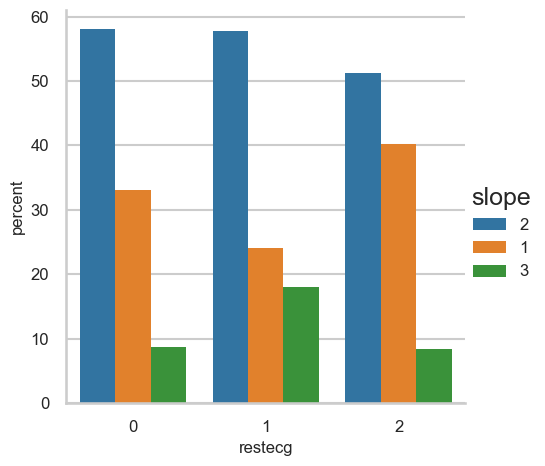

In [218]:
(data[(data['restecg'] != '<NA>') & (data['slope'] != '<NA>')].groupby('restecg')['slope']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='restecg',y='percent',hue='slope',kind='bar'))

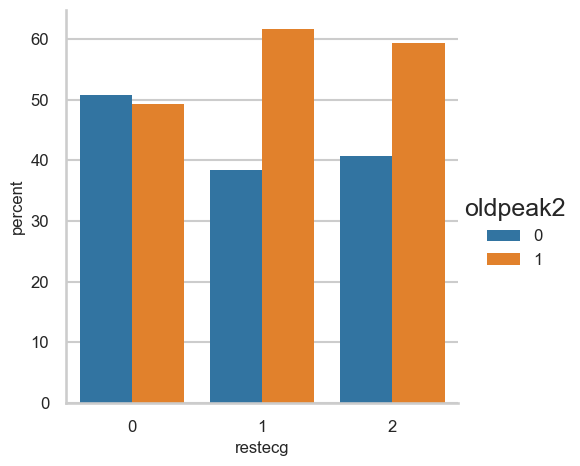

In [219]:
(data[(data['restecg'] != '<NA>') & (data['oldpeak2'] != '<NA>')].groupby('restecg')['oldpeak2']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='restecg',y='percent',hue='oldpeak2',kind='bar'))

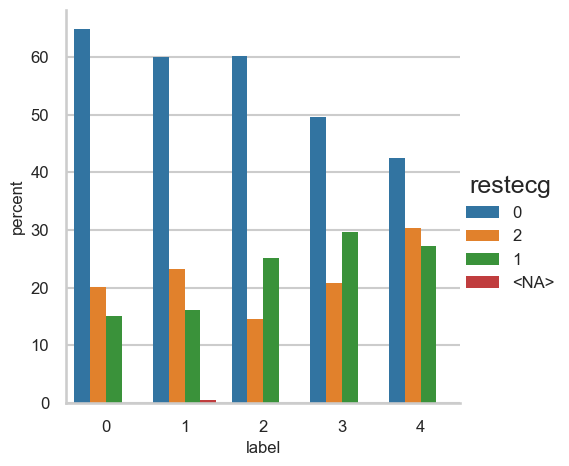

In [215]:
(data.groupby('label')['restecg']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='label',y='percent',hue='restecg',kind='bar'))

In [220]:
data['split'].value_counts()

train    691
val      174
Name: split, dtype: int64